# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [11]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [11]:
# your answer here

employee = pd.read_csv('Employee.csv')
employee.head(40)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [7]:
# your answer here-1st way
employee.groupby('Department')['Salary'].agg('mean')

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [12]:
# your answer here-2nd way
employee.pivot_table(values='Salary',index='Department', aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [13]:
# your answer here
employee.pivot_table(values='Salary',index=['Department','Title'], aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [14]:
# your answer here
employee.pivot_table(values=['Salary','Years'],index=['Title'])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [19]:
# your answer here
employee.pivot_table(values=['Salary','Name'],index=['Title'], aggfunc={'Salary':'mean','Name':'count'})

,Name,Salary
Title,,
VP,2,70.000000
analyst,4,32.500000
associate,3,56.666667


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [20]:
# your answer here
employee.pivot_table(values=['Salary'],index=['Title'], aggfunc={'Salary': ['min','max','std']})

Salary                
             max   min       std
Title                           
VP          70.0  70.0  0.000000
analyst     35.0  30.0  2.886751
associate   60.0  55.0  2.886751

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [22]:
# your answer here
employee.pivot_table(values=['Salary','Name'],index=['Department'], aggfunc={'Salary': ['sum'], 'Name':'count'})

,Name,Salary
,count,sum
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [23]:
# your answer here
employee.pivot_table(values=['Years','Salary'],index=['Department','Title'], aggfunc={'Salary': ['mean'], 'Years':'sum'})

Salary Years
                       mean   sum
Department Title                 
HR         VP          70.0     8
           analyst     32.5     6
IT         VP          70.0     8
           analyst     32.5     3
           associate   60.0     7
Sales      associate   55.0     5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [3]:
# your answer here

fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [9]:
# your answer here
print(fitbit.dtypes)
fitbit.head(5)

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [5]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [10]:
# your answer here
fitbit['Steps'].corr(fitbit['Minutes Very Active'])

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

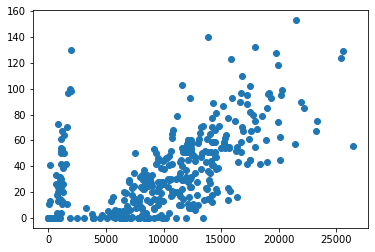

In [12]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
# in most of the data, there is a positive correlation

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [14]:
# your answer here
fitbit['Steps'].corr(fitbit['Minutes Sedentary'])

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

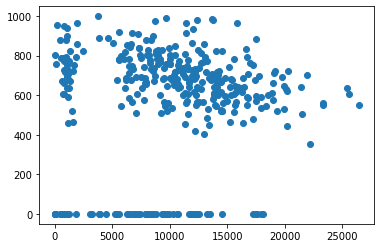

In [15]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])

In [22]:
# Your comment here
#as we can see, correlation is 0.07 which is basically a bad correlation, the one that may help us is above 0.6

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [16]:
# your answer here
fitbit['Steps'].corr(fitbit['MinutesOfSleep'])

0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

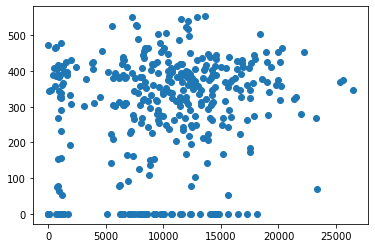

In [17]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['MinutesOfSleep'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [19]:
# your answer here
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

In [21]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [37]:
# your answer here
cor_fit.sort_values(by=['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep'], ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [38]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [41]:
#Print time_grades
print(time_grades)

        Name  Study time  Grade
0       Jose           4      4
1      Maria           9      7
2      David           8      9
3      Sonia          10      7
4     Samuel          20      9
5        Eva           5      3
6     Carlos          12      7
7      Pedro           6      5
8        Ana          18      9
9   Gervasio           7      3
10     Gemma           7      8
11    Alicia          11      7
12  Jonathan           2      1
13  Cristina          13      8
14     Pilar           3      2


#### Show visually the frequency distribution of the time_grades dataset.

In [40]:
# your answer here
time_grades.value_counts()

Name      Study time  Grade
Alicia    11          7        1
Ana       18          9        1
Carlos    12          7        1
Cristina  13          8        1
David     8           9        1
Eva       5           3        1
Gemma     7           8        1
Gervasio  7           3        1
Jonathan  2           1        1
Jose      4           4        1
Maria     9           7        1
Pedro     6           5        1
Pilar     3           2        1
Samuel    20          9        1
Sonia     10          7        1
dtype: int64

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [42]:
# your answer here-Pearson 
time_grades.corr(method='pearson')
# seems there is a correlation since value is more than 0.6

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [44]:
## your answer here-Spearman
time_grades.corr(method='spearman')
# seems there is a correlation since value is more than 0.6

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

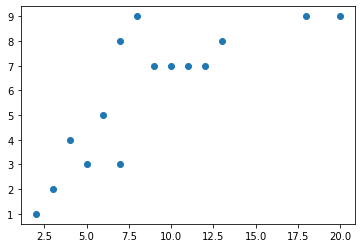

In [47]:
# your answer here
plt.scatter( x=time_grades['Study time'], y= time_grades['Grade'])

In [34]:
#your comment here
# there is a positive correlation since x and y values are increasing as well in most of the cases 

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [48]:
#your comment here
#pearson is used to know if both values are having similar behaviour (both are going up or down)
#Spearman is similar to pearson however there is another case that is when both are going up even if increase or decrease value is not continues, that means not all values should be increased in the same intensity